Welcome to the Convergent Wisdom project! This module presents a sample word cloud sentiment analysis of a 92-sentence story about world unity generated by artificial intelligence, located in the samplesentimentanalysis.csv file in the Github repository. Non-word cloud sentiment analyses are located in the Sample Sentiment Analysis module.

Word cloud methods are applied to the study of the Bhagavad Gita (Hinduism), Qur'an (Islam), and Bible (Christianity) in a separate module.

In [1]:
import pandas as pd
import requests
from io import StringIO

github_csv_url_Gita = 'https://raw.githubusercontent.com/justinjunge/Convergent-Wisdom-Project/master/samplesentimentanalysis.csv'
response1 = requests.get(github_csv_url_Gita)
if response1.status_code == 200:
  df = pd.read_csv(StringIO(response1.text))
else:
  print('Failed to fetch CSV File from Github')

print(df)

    Number                                               Text
0        1  In a not-so-distant future, the world was on t...
1        2  The planet had seen its fair share of conflict...
2        3  The idea of global unity had taken root in the...
3        4  The story begins in a small village nestled in...
4        5  A young girl named Aria lived there, surrounde...
..     ...                                                ...
87      88  The world became a tapestry of diverse culture...
88      89  Despite the challenges that remained, the worl...
89      90  The vision of the ancient prophecy had become ...
90      91  People looked to the future with hope and dete...
91      92  The global symphony of unity continued to play...

[92 rows x 2 columns]


Great! Now that we have our text file, we will import the necessary libraries and first create a word cloud of the entire text.

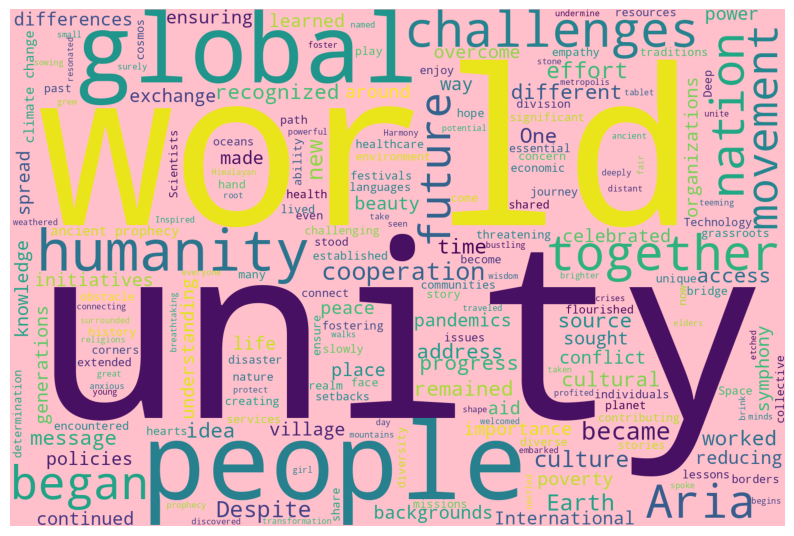

In [2]:
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

dev = df.Text
output = ''

for line in dev:
        output += '{} '.format(line)

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width = 1500, height = 1000, background_color='pink').generate(output)
plot_cloud(wordcloud)

In this whole-text word cloud, we see that 'unity' and 'world' stand out. This makes sense as we did ask artificial intelligence to generate a story about world unity.

Pretty cool, right? Now, we can combine this code with tools from SentimentIntensityAnalyzer to create positive, negative, and neutral word clouds of the text. This allows us to visualize the distribution of emotional language throughout the story, with particular emphasis on highlighting what most positive and most negative sentiments drive the tale.

We will first create a word cloud that shows the frequency of words with positive sentiment in the text.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


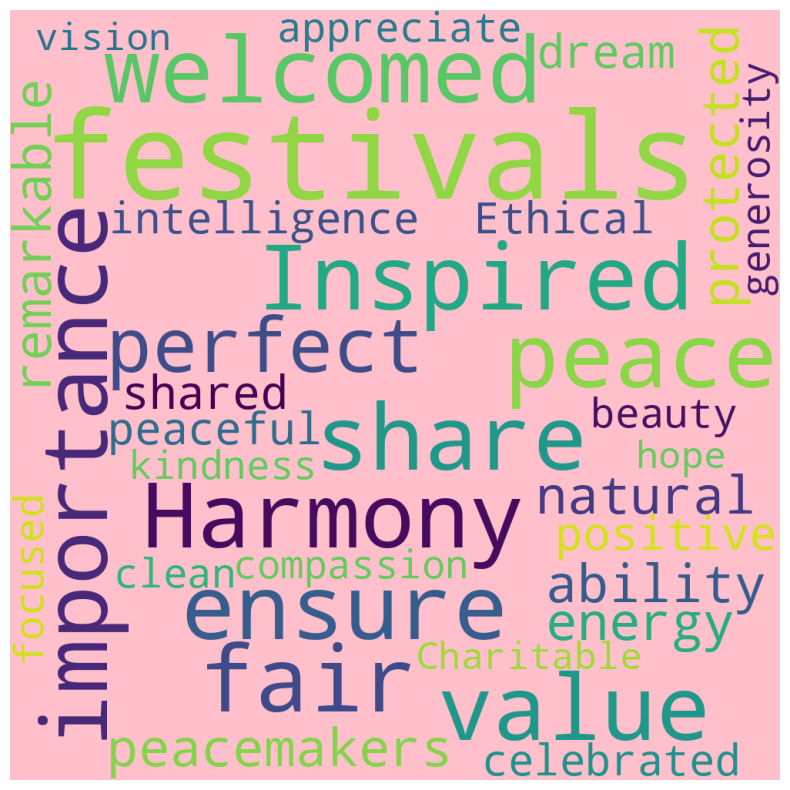

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

wordStory = df.Text
wordStory = wordStory.to_string()

for word in wordStory.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)

sposdf = pd.DataFrame (pos_word_list, columns = ['words'])

output2 = ''

for line in sposdf.words:
        output2 += '{} '.format(line)

def plot_cloud(wordcloud2):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud2)
    plt.axis("off");
wordcloud2 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output2)
plot_cloud(wordcloud2)

In this positive word cloud, we see that 'festivals,' 'peace,' and 'harmony' stand out. 'Share,' 'fair,' and 'value' are also quite large. This helps gives us an idea of the definition that 'world unity' takes on in this story.

Next, we will create a word cloud that shows the frequency of words with negative sentiment in the text.

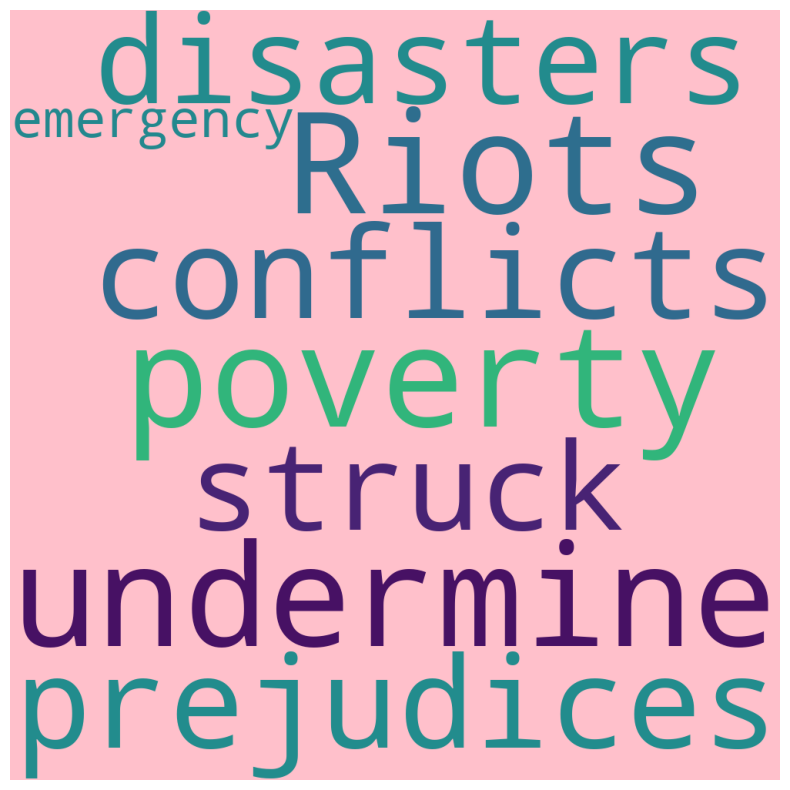

In [4]:
snegdf = pd.DataFrame (neg_word_list, columns = ['words'])

output3 = ''

for line in snegdf.words:
        output3 += '{} '.format(line)

def plot_cloud(wordcloud3):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud3)
    plt.axis("off");
wordcloud3 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output3)
plot_cloud(wordcloud3)

In this negative word cloud, we see that the SentimentIntensityAnalyzer identifies relatively few negative words in the story about world unity.

Finally, we will create a word cloud that shows the frequency of words with neutral sentiment in the text.

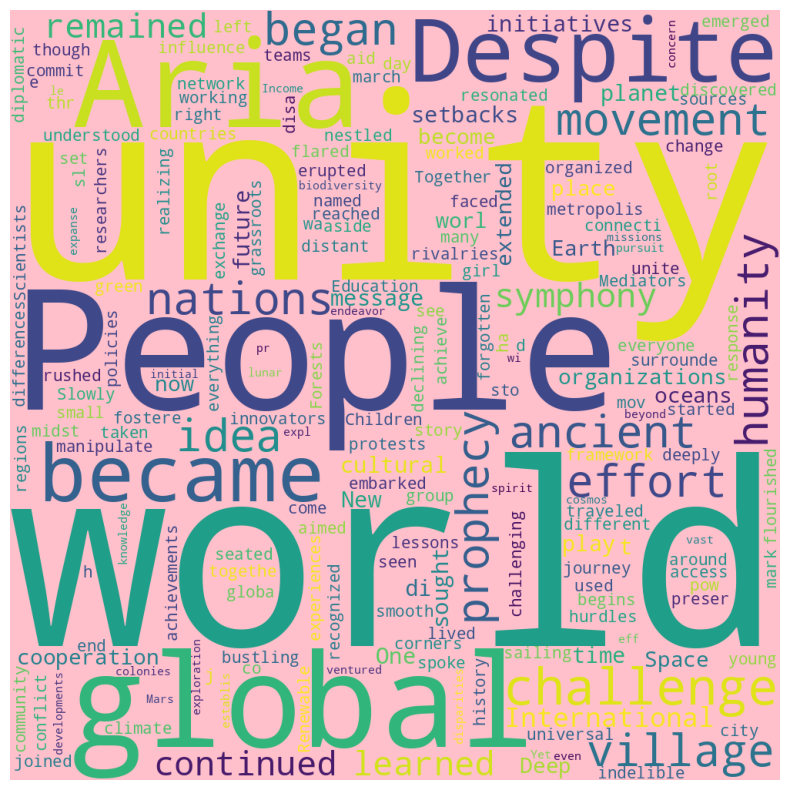

In [5]:
sneudf = pd.DataFrame (neu_word_list, columns = ['words'])

output4 = ''

for line in sneudf.words:
        output4 += '{} '.format(line)

def plot_cloud(wordcloud4):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud4)
    plt.axis("off");
wordcloud4 = WordCloud(width = 1000, height = 1000, background_color='pink', collocations=False).generate(output4)
plot_cloud(wordcloud4)

In this neutral word cloud, we see that the density of the figure implies that SentimentIntensityAnalyzer believes that most words in the story carry a neutral sentiment.

As you can see, word clouds are a highly effective (and interesting!) way to quickly visualize the distribution of emotional language throughout a text. On a larger scale, word clouds can also portray thematic elements and stylistic quirks of a text. There are many ways such visualizations could be beneficial in the toolbox of a psychologist or any professional who analyzes large amounts of data or needs to quickly assess patterns. These methods are applied to the study of religious texts in a future module.

## **Try it Yourself!**

World unity and religious texts are certainly fascinating, but what if you wanted to quickly creative positive and negative emotional word clouds for almost any topic? The tool below does just that, allowing for the ability to create emotional word clouds for any Wikipedia article.

Try it out! All you have to do is change the wikipedia link (as easy as writing the title of your article in the appropriate location in the link) and word clouds will be generated for that Wikipedia article.

In [6]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=bdb2bcfa4d4352fda6d7701a272e2d8c42679f773143ba04ad9a78d4147eb41d
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


This first word cloud represents the frequency of all words within  the summary of any inputted Wikipedia article. The summary is all portions at the beginning of a Wikipedia article before a table of contents or a major header.

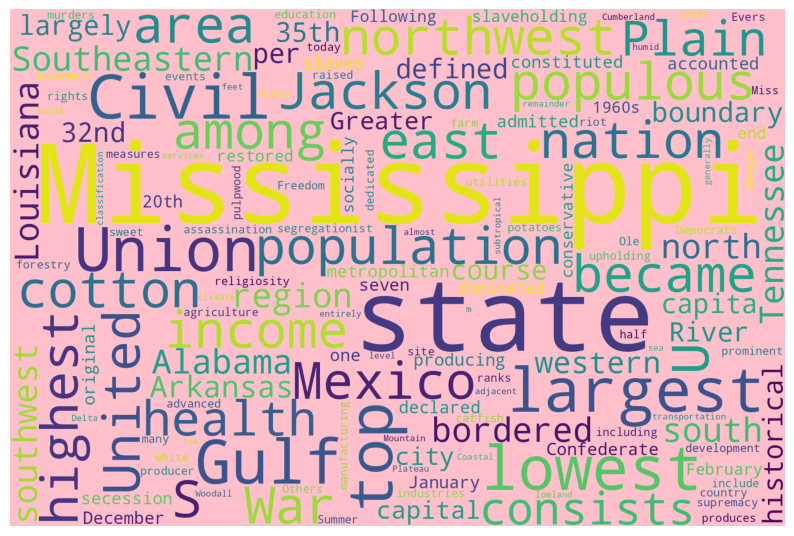

In [7]:
import wikipedia as wiki
import pandas as pd
from io import StringIO

summary = wiki.summary('Mississippi')
summarytable = summary.split('. ')
dfwiki = pd.DataFrame(summarytable, columns = ['SummaryText'])

import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

dev2 = dfwiki.SummaryText
output5 = ''

for line in dev2:
        output5 += '{} '.format(line)

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud5 = WordCloud(width = 1500, height = 1000, background_color='pink').generate(output5)
plot_cloud(wordcloud5)

This second word cloud represents the frequency of all positive words within  the summary of any inputted Wikipedia article. The summary is all portions at the beginning of a Wikipedia article before a table of contents or a major header.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


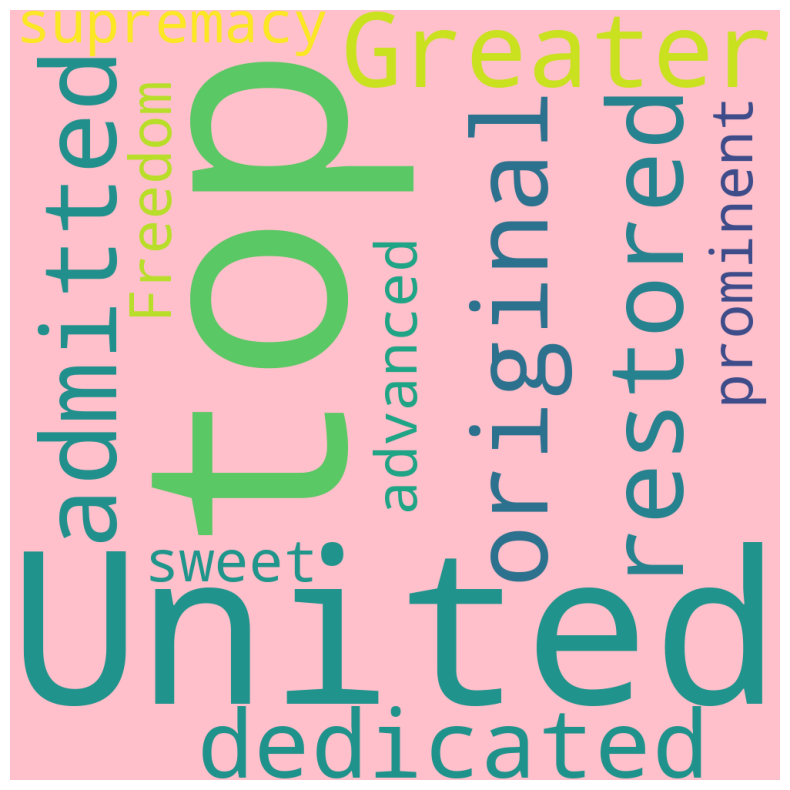

In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

summary2 = wiki.summary('Mississippi')
summarytable2 = summary2.split('. ')
dfwiki2 = pd.DataFrame(summarytable2, columns = ['SummaryText'])

for word in summary2.split():
    if (sid.polarity_scores(word)['compound']) >= 0.05:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.05:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)

wikiposdf = pd.DataFrame (pos_word_list, columns = ['words'])

output6 = ''

for line in wikiposdf.words:
        output6 += '{} '.format(line)

def plot_cloud(wordcloud6):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud6)
    plt.axis("off");
wordcloud6 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output6)
plot_cloud(wordcloud6)


This third word cloud represents the frequency of all negative words within the summary of any inputted Wikipedia article. The summary is all portions at the beginning of a Wikipedia article before a table of contents or a major header.

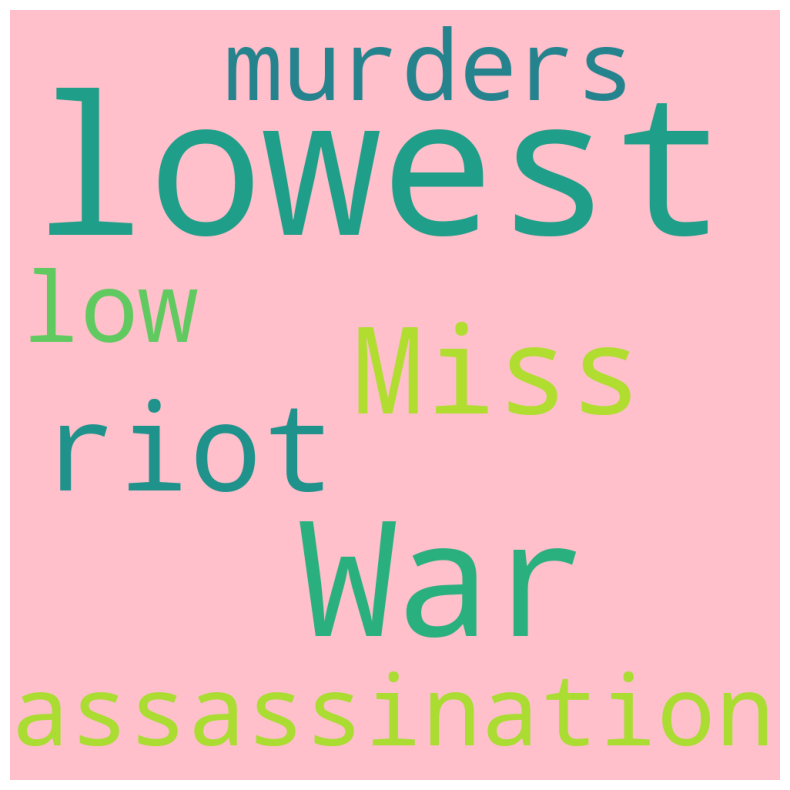

In [9]:
wikinegdf = pd.DataFrame (neg_word_list, columns = ['words'])

output7 = ''

for line in wikinegdf.words:
        output7 += '{} '.format(line)

def plot_cloud(wordcloud7):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud7)
    plt.axis("off");
wordcloud7 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output7)
plot_cloud(wordcloud7)

This fourth word cloud represents the frequency of all neutral words within the summary of any inputted Wikipedia article. The summary is all portions at the beginning of a Wikipedia article before a table of contents or a major header.

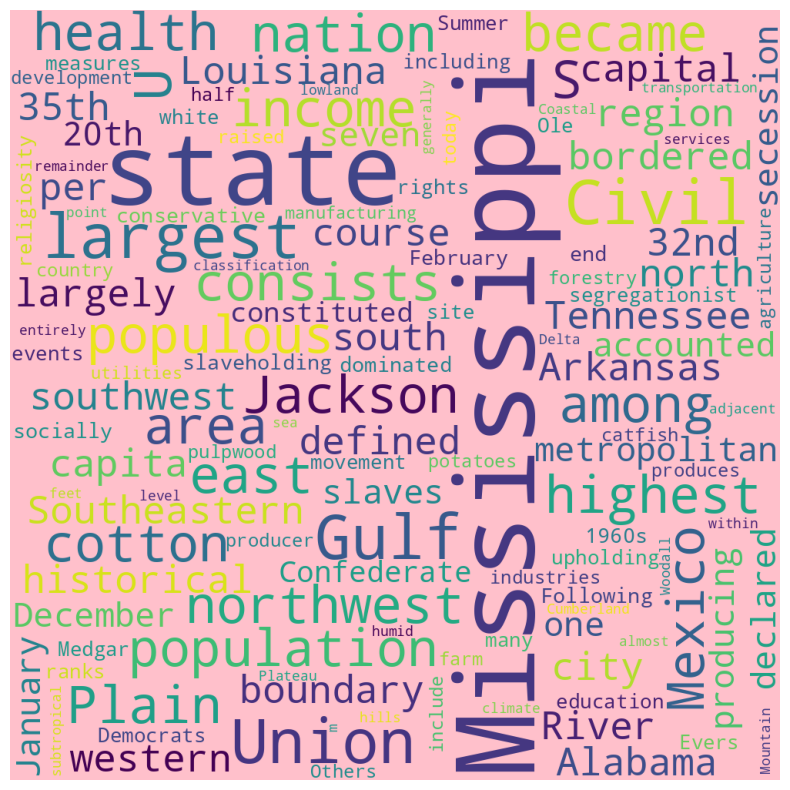

In [10]:
wikineudf = pd.DataFrame (neu_word_list, columns = ['words'])

output8 = ''

for line in wikineudf.words:
        output8 += '{} '.format(line)

def plot_cloud(wordcloud8):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud8)
    plt.axis("off");
wordcloud8 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output8)
plot_cloud(wordcloud8)

The previous code only considers a Wikipedia article's summary. For demonstration purposes this is ideal, as code that extracts larger portions of text from Wikipedia takes longer to run.

Below, code is provided that can generate word clouds for an entire Wikipedia article, not just the summary. Please note that this code may take several minutes to run.

The first word cloud depicts the frequency of all words in the inputted article.

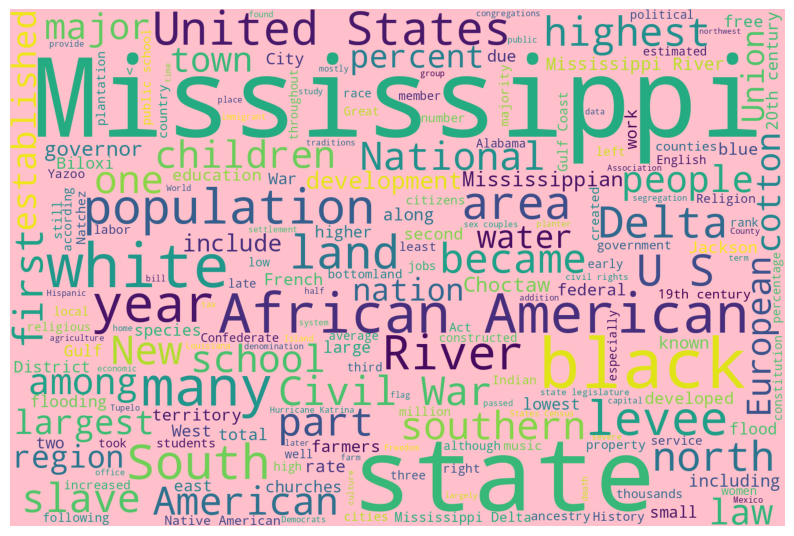

In [11]:
import wikipedia as wiki
import pandas as pd
from io import StringIO

summary = wiki.page('Mississippi').content
summarytable = summary.split('. ')
dfwiki = pd.DataFrame(summarytable, columns = ['SummaryText'])

import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

dev2 = dfwiki.SummaryText
output5 = ''

for line in dev2:
        output5 += '{} '.format(line)

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud5 = WordCloud(width = 1500, height = 1000, background_color='pink').generate(output5)
plot_cloud(wordcloud5)

This second word cloud displays the frequency of all positive words in an inputted article.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


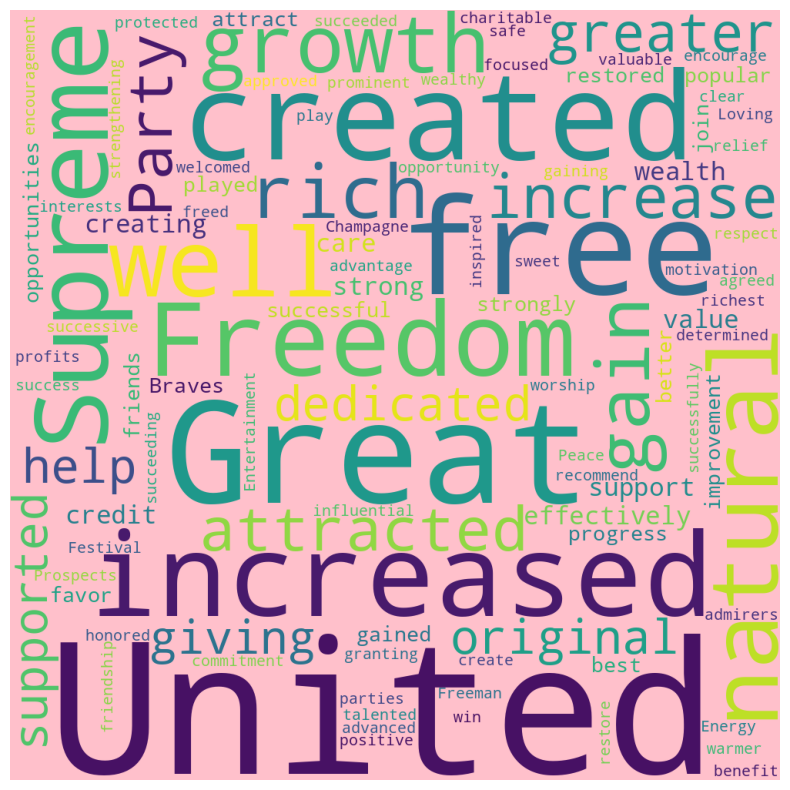

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

summary2 = wiki.page('Mississippi').content
summarytable2 = summary2.split('. ')
dfwiki2 = pd.DataFrame(summarytable2, columns = ['SummaryText'])

for word in summary2.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)

wikiposdf = pd.DataFrame (pos_word_list, columns = ['words'])

output6 = ''

for line in wikiposdf.words:
        output6 += '{} '.format(line)

def plot_cloud(wordcloud6):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud6)
    plt.axis("off");
wordcloud6 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output6)
plot_cloud(wordcloud6)

This third word cloud displays the frequency of all negative words in an inputted article.

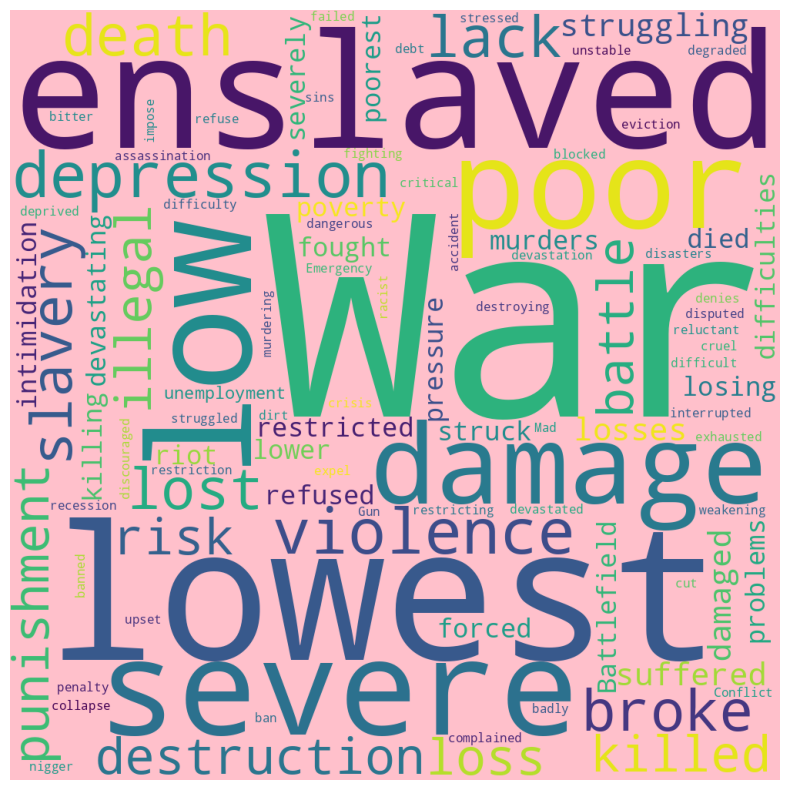

In [13]:
wikinegdf = pd.DataFrame (neg_word_list, columns = ['words'])

output7 = ''

for line in wikinegdf.words:
        output7 += '{} '.format(line)

def plot_cloud(wordcloud7):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud7)
    plt.axis("off");
wordcloud7 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output7)
plot_cloud(wordcloud7)

This fourth word cloud displays the frequency of all neutral words in an inputted article.

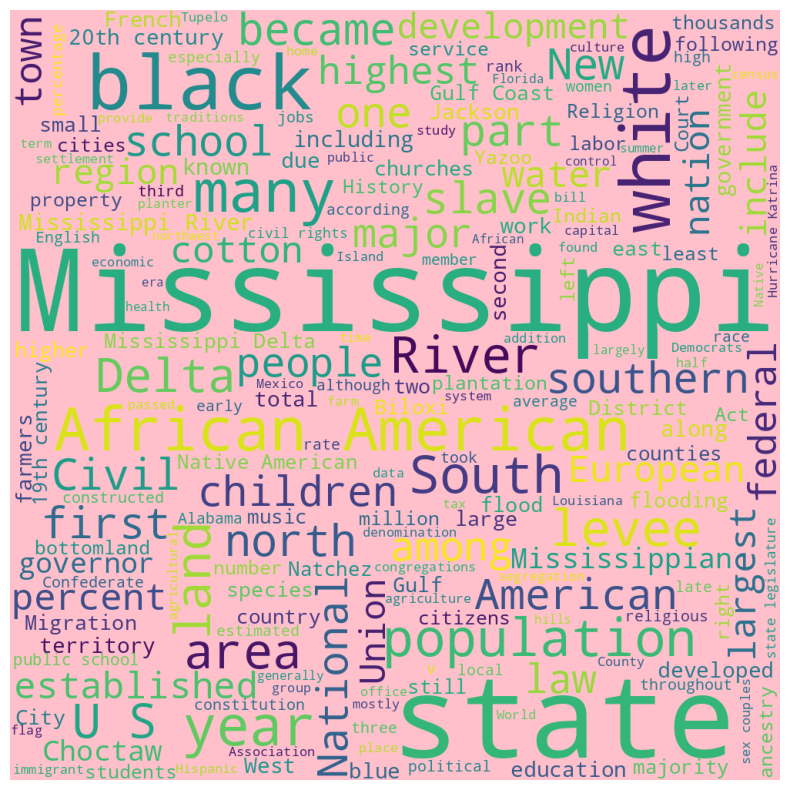

In [14]:
wikineudf = pd.DataFrame (neu_word_list, columns = ['words'])

output8 = ''

for line in wikineudf.words:
        output8 += '{} '.format(line)

def plot_cloud(wordcloud8):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud8)
    plt.axis("off");
wordcloud8 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output8)
plot_cloud(wordcloud8)

As you can see, word cloud sentiment analysis methodologies are a treasure trove of untapped potential when it comes to all types of research. Its use is demonstrated in the study of psychology and religion in this project, but it can also be extended to the study of literature, history, philosophy, politics, economics and more. Feel free to play with the code, try different inputs, and see what new horizons you can take this too!

Next, check out the Holy Text word clouds and sentiment analyses!